In [16]:
import networkx as nx
import matplotlib.pyplot as plt

n=100 #Number of nodes
m=20 #Number of initial links, calculated by n/5
l=round(n/2) #Number of node divided by 2 and round up to an integer 
G=nx.stochastic_block_model([l, l], [[0.25, 0.05], [0.05, 0.25]])  #create a stochastic block model graph with [l,l] size and the eddge density as [0.25, 0.05] and [0.05, 0.25]
#G=nx.barabasi_albert_graph(n, m) #create a barabasi groph with n nodes and m initial links

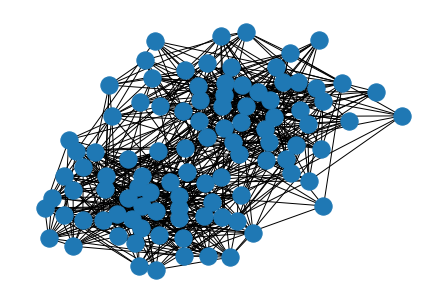

In [17]:
nx.draw(G) #show the graph connections

In [21]:
#check the amount of square connection prior to any changes
f=[]
for i in range(n):
    c=0
    for j in range(n):
        for k in range(n):
            for l in range(n): #run through every node numbers as i, j, k  and l
                if(i!=j and j!=k and k!=l and l!=i and l!=j and i!=k and G.get_edge_data(i, j, default=0)!=0 and G.get_edge_data(j, k, default=0)!=0 and G.get_edge_data(k, l, default=0)!=0 and G.get_edge_data(l, i, default=0)!=0):
                    c=c+1 #check if i, j, k and l is not the same node number and that they are connected as a square
    f.append(c)
sum(f)

50288

In [22]:
sum(f)/8 #divide by 8 to cancel out repetitive combinations

6286.0

In [23]:
import math
E=5 #set epsilon constant
p1=1/(1+(math.e**E)) #calculate p1 constant from the equation p1=1/(1+e^E)
print(p1)
p2=1-p1 #calculate p2 constant from the equation p2=1-p1
print(p2)
p3=(((math.e**E)+1)-1)/((math.e**E)-1) #calculate p3 constant from the equation p3=((1+e^E)-1)/(-1+e^E)
print(p3)
p4=-1/((math.e**E)-1) #calculate p4 constant from the equation p4=-1/(-1+e^E)
print(p4)

0.006692850924284857
0.9933071490757152
1.0067836549063043
-0.006783654906304232


In [24]:
import random
for i in range(n):
    for j in range(n): #run through every node numbers as i and j 
        x = random.random() #randomize a number
        if(x<p1): #if the randomize number is less than the p1 constant, initiated a flip on the connection between node i and j
            if(G.get_edge_data(i, j, default=0)!=0 and i<j):
                G.remove_edge(i, j) #if there was a connection, remove the connection between i,j
            elif(G.get_edge_data(i, j, default=0)==0 and i<j):
                G.add_edge(i, j) #if there was not a connection, create the connection between i,j

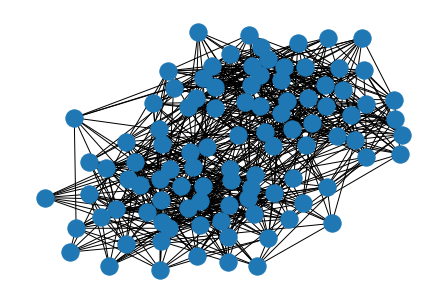

In [25]:
nx.draw(G) #show the graph connections after flipping

In [26]:
import numpy as np 
a = np.zeros((n,n)) #create a zero matrix with nxn dimention where n is number of nodes
print(a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
for i in range(n):
    for j in range(n):
        if(G.get_edge_data(i, j, default=0)!=0): #if there is no connection between node i and j the value at a[ij] is p3
            a[i][j]=p3
        else: #if there is a connection between node i and j the value at a[ij] is p4
            a[i][j]=p4

In [28]:
print(a) #show matrix a

[[-0.00678365 -0.00678365 -0.00678365 ... -0.00678365 -0.00678365
  -0.00678365]
 [-0.00678365 -0.00678365 -0.00678365 ...  1.00678365 -0.00678365
  -0.00678365]
 [-0.00678365 -0.00678365 -0.00678365 ... -0.00678365 -0.00678365
  -0.00678365]
 ...
 [-0.00678365  1.00678365 -0.00678365 ... -0.00678365 -0.00678365
   1.00678365]
 [-0.00678365 -0.00678365 -0.00678365 ... -0.00678365 -0.00678365
  -0.00678365]
 [-0.00678365 -0.00678365 -0.00678365 ...  1.00678365 -0.00678365
  -0.00678365]]


In [29]:
import numpy as np
from itertools import permutations

def sum_of_products_for_combinations(adj_matrix):
    A = np.array(adj_matrix) #create aa numpy array from the input matrix
    n = A.shape[0]  # Number of nodes in the graph
    sum_of_products = 0
    for perm in permutations(range(n), 4):
        i, j, k, l = perm
        product = A[i][j] * A[j][k] * A[k][l] * A[l][i]
        sum_of_products += product
    return sum_of_products

result = sum_of_products_for_combinations(a) #run the function with matix a as the input
print(result)

51085.19262970471


In [30]:
print(result/8) #divide by 8 to cancel out repetitive combinations

6385.649078713089
